## Baseline RF Model

Next I established a baseline random forest using only the numerical features in the dataset.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score

sns.set()
plt.rcParams["figure.figsize"] = (10, 8)
SEED = 42

train = pd.read_csv("assets/train.csv")
test = pd.read_csv("assets/test.csv")

X = train.copy()
y = X.pop("Survived")

In [20]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
X["Age"].fillna(X["Age"].mean(), inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
features = set([c for c in X.columns if X[c].dtype != "object"])
X = X.drop(columns=[c for c in X.columns if c not in features]+["PassengerId"])
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 5), (179, 5), (712,), (179,))

In [24]:
rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=SEED)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [25]:
yhat = rf.predict(X_test)
yhat

array([0.34153808, 0.14736667, 0.33266667, 0.957     , 0.53675   ,
       0.812     , 0.43318153, 0.06866667, 0.46991667, 0.85413333,
       0.908     , 0.0865    , 0.016     , 0.10368398, 0.72890278,
       0.649     , 0.8275    , 0.24222583, 0.28207143, 0.1855    ,
       0.004     , 0.51072024, 0.12516667, 0.023     , 0.00633333,
       0.008     , 0.52963333, 0.38069722, 0.111     , 0.62193333,
       0.04131667, 0.79119551, 0.862     , 0.06430897, 0.41554286,
       0.27524881, 0.575     , 0.43318153, 0.32775   , 0.        ,
       0.163     , 0.16641439, 0.        , 0.43318153, 0.055     ,
       0.0925    , 0.42377619, 0.011     , 0.235     , 0.779     ,
       0.817     , 0.302     , 0.0098    , 0.926     , 0.191     ,
       0.597     , 0.2965    , 0.57      , 0.21935952, 0.3375    ,
       0.487     , 0.835     , 0.828     , 0.1843    , 0.43318153,
       0.659     , 0.315     , 0.9475    , 0.285     , 0.812     ,
       0.74485   , 0.55      , 0.717     , 0.9       , 0.227  

In [33]:
roc = roc_auc_score(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
score = rf.score(X_test, y_test) #r2
oob_score = rf.oob_score_ #oob

roc, mse, score, oob_score

(0.7820463320463321,
 0.19351983082157723,
 0.20198598463910467,
 0.02067516243831824)

In [29]:
feat_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
feat_importances

,Importance
Fare,0.413094
Age,0.382893
Pclass,0.091104
SibSp,0.068540
Parch,0.044370


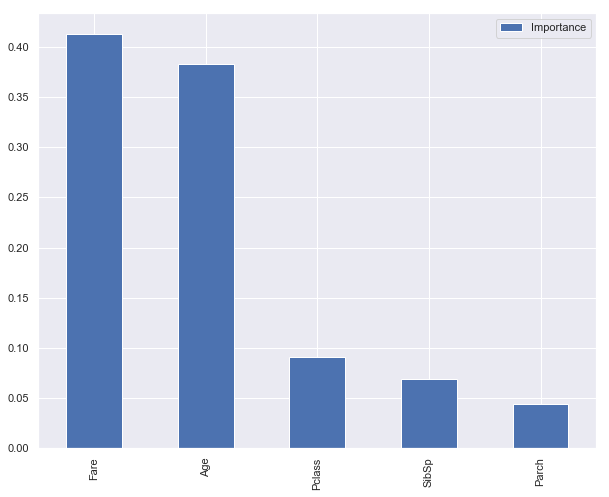

In [30]:
feat_importances.plot(kind="bar")